# Indian Airlines Ticket Price Analysis
##### Samarth Chetan
##### MS in Data Analytics Engineering
##### Northeastern University

In [3]:
# importing necessary libraries for conducting EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
# reading the dataset using built-in functions
df = pd.read_csv("Indian Airlines.csv")
df.head(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [10]:
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [11]:
# understanding column information
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


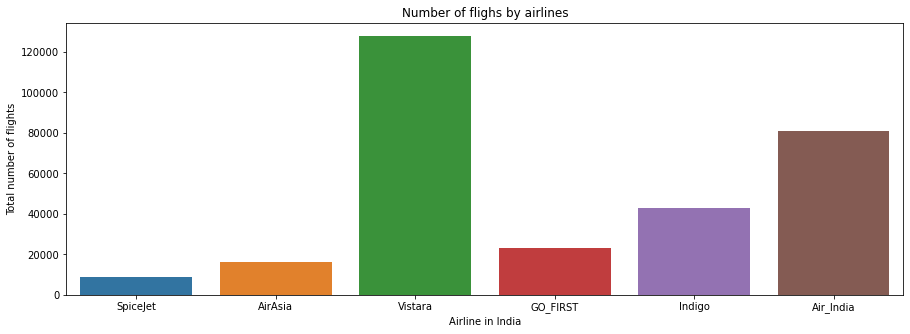

In [15]:
# conducting EDA
# number of flights operating form each airlines
from turtle import title
plt.figure(figsize=(15,5))
NF = sns.countplot(x='airline', data = df)
NF.set(xlabel='Airline in India', ylabel='Total number of flights', title='Number of flighs by airlines')
plt.show(NF)


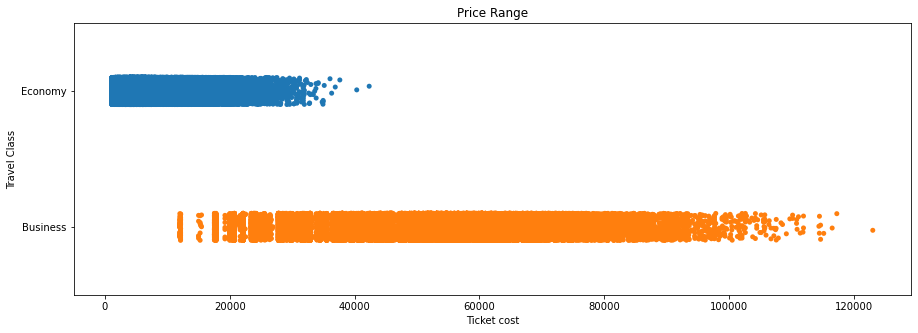

In [14]:
# price range analysis as a factor of class of travel
from turtle import title
plt.figure(figsize=(15,5))
CE = sns.stripplot(x='price', y='class', data = df)
CE.set(xlabel='Ticket cost', ylabel='Travel Class', title='Price Range')
plt.show(CE)

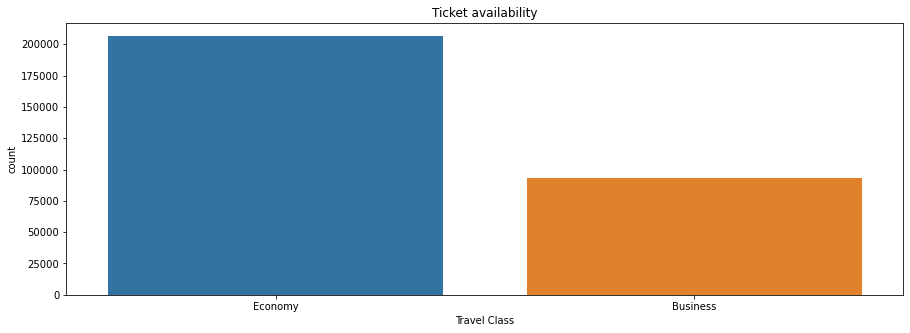

In [17]:
#ticket availability by class of travel
from turtle import title
plt.figure(figsize=(15,5))
TA = sns.countplot(x='class', data = df)
TA.set(xlabel='Travel Class', title='Ticket availability')
plt.show(TA)

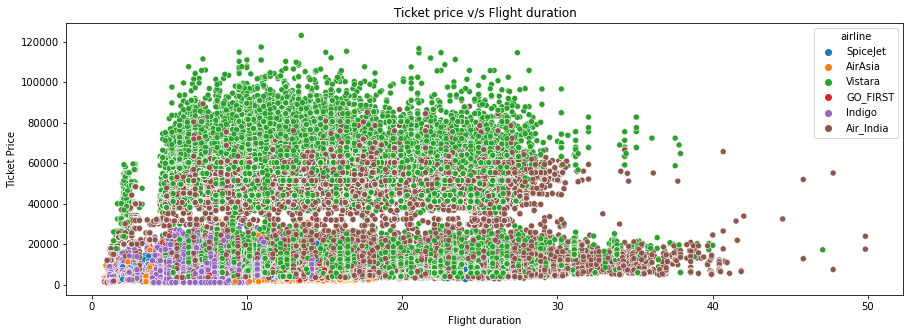

In [20]:
#price of ticekts based on duration of flight
plt.figure(figsize=(15,5))
PD = sns.scatterplot(df['duration'], df['price'], hue= df['airline'])
PD.set(xlabel='Flight duration', ylabel='Ticket Price', title='Ticket price v/s Flight duration')
plt.show(PD)

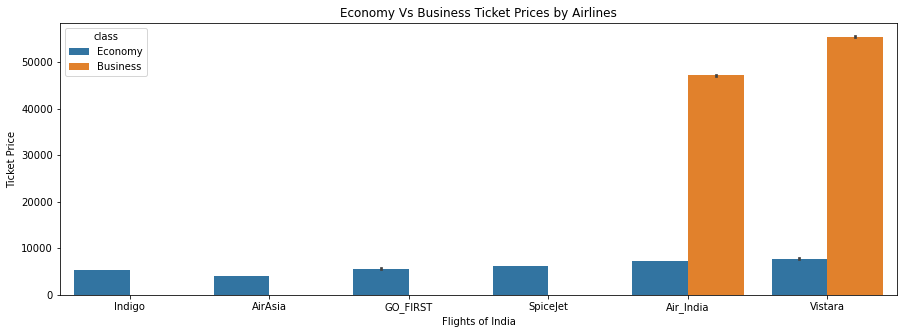

In [21]:
# Ticket prices by class and type of airlines
plt.figure(figsize=(15,5))
AS = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
AS.set(xlabel='Flights of India', ylabel='Ticket Price', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(AS)

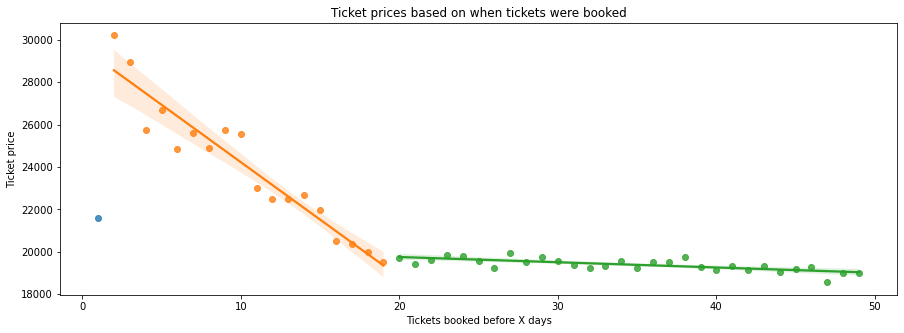

In [23]:
# Variation of ticket prices by date of purchase
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
ax = plt.axes()
sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False, ax=ax)
sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True, ax=ax)
sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True, ax=ax)
ax.set(xlabel='Tickets booked before X days', ylabel='Ticket price', title='Ticket prices based on when tickets were booked')
plt.show(ax)

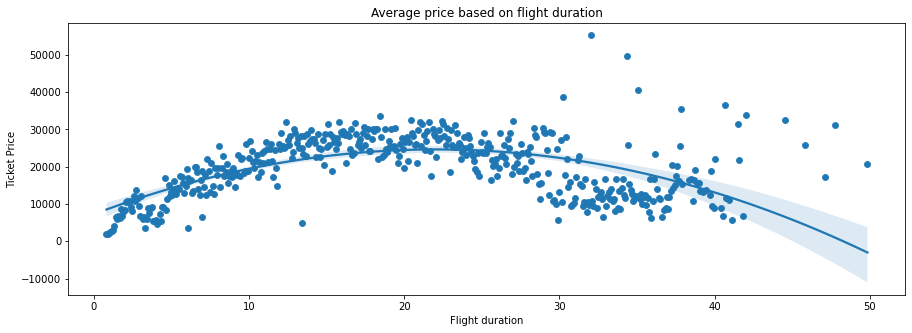

In [24]:
# average price based on flight duration
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(15,5))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2)
PD.set(xlabel='Flight duration', ylabel='Ticket Price', title='Average price based on flight duration')
plt.show(PD)

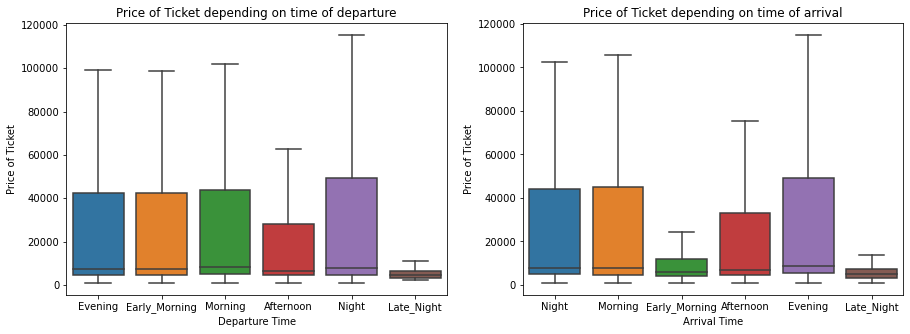

In [27]:
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
sns.boxplot(data = df, x = 'departure_time', y = 'price', showfliers = False).set(xlabel = 'Departure Time', ylabel = 'Price of Ticket', title ='Price of Ticket depending on time of departure')
plt.subplot (1,2,2)
sns.boxplot(data = df, x = 'arrival_time', y = 'price', showfliers =  False).set(xlabel = 'Arrival Time', ylabel = 'Price of Ticket', title = 'Price of Ticket depending on time of arrival')
plt.show()

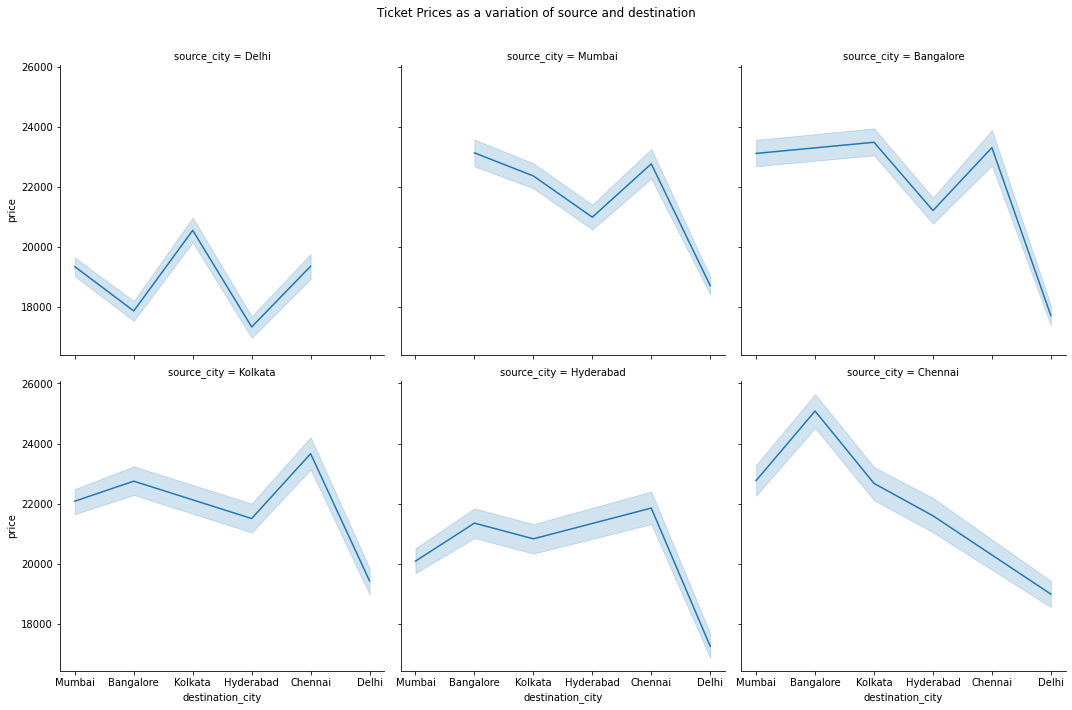

In [31]:
# price variatoin based on source and destination
ax = sns.relplot(x = 'destination_city', y = 'price', col='source_city', col_wrap= 3, kind= 'line', data = df)
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Ticket Prices as a variation of source and destination')
plt.show(ax)


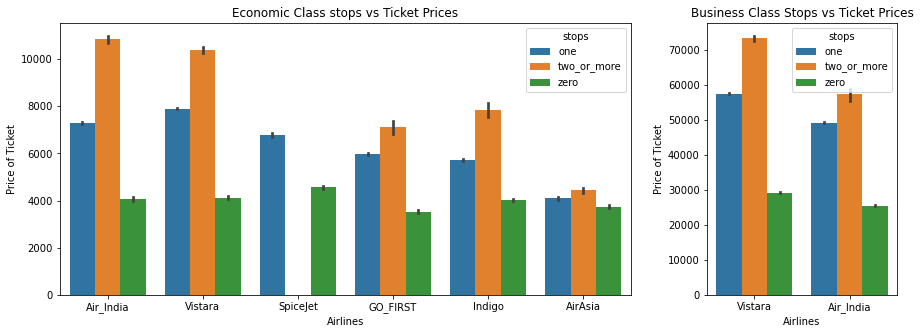

In [33]:
# Price variation as a factor of number of stops 
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [3,1]}, figsize = (15,5))
sns.barplot(y = 'price', x = 'airline', hue = 'stops', data = df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Economic Class stops vs Ticket Prices')
sns.barplot(y='price', x='airline', hue='stops', data= df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Business Class Stops vs Ticket Prices')
plt.show(fig, axs)